# PROBLEM STATEMENT

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

**Which variables best predict future user adoption?**

Adoption: >= 3 login days within a 7 day period.



## Import packages

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [22]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin')
df_usereng = pd.read_csv('takehome_user_engagement.csv')

## Analyze Users Engagment

In [54]:
df_usereng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [55]:
df_usereng.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [56]:
df_usereng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [57]:
df_usereng.time_stamp = pd.to_datetime(df_usereng.time_stamp)

In [58]:
df_usereng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [59]:
df_usereng = df_usereng.sort_values('time_stamp')

In [60]:
df_usereng = df_usereng.set_index('time_stamp')

In [61]:
df_usereng.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [62]:
temp = df_usereng.groupby('user_id')['visited'].rolling('7D', min_periods=1).count()

In [63]:
df_usereng = df_usereng.sort_values('user_id')


In [64]:
df_usereng['rolling_engagment'] = temp.values

In [65]:
temp = df_usereng.groupby('user_id')['rolling_engagment'].max()


In [66]:
adopted_user = temp >= 3


In [67]:
df_adopted_user = pd.DataFrame(adopted_user)


In [68]:
df_adopted_user = df_adopted_user.rename(columns={'rolling_engagment':'adopted_user'})


In [69]:
df_adopted_user.head()

,adopted_user
user_id,
1,False
2,True
3,False
4,False
5,False


## Analyze Users dataframe

In [23]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [25]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [27]:
# Update creation_time to datetime
df_users.creation_time = pd.to_datetime(df_users.creation_time)

In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [29]:
# Check for null values
df_users.isnull().sum().sort_values(ascending=False)

invited_by_user_id            5583
last_session_creation_time    3177
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
dtype: int64

The missing values in invited_by_user_id probably represent users that signed up without an invitation. We check for this:


In [36]:
df_users[df_users['invited_by_user_id'].isna()]['creation_source'].unique()

array(['SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [37]:
df_users[~df_users['invited_by_user_id'].isna()]['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

We see that our assumption was correct. We impute these values with "not invited".

In [38]:
df_users.loc[df_users['invited_by_user_id'].isna(), 'invited_by_user_id'] = 'not invited'

The missing values in last_session_creation_time probably represent users that never logged in to their accounts after account creation. We first check this by merging the original user engagment dataframe with the users dataframe to see if there are any usages recorded in the original user engagment dataframe.


In [39]:
temp = pd.read_csv('takehome_user_engagement.csv')
dftemp = df_users.merge(temp, how='left', left_on='object_id', right_on='user_id')

In [40]:
dftemp[dftemp['last_session_creation_time'].isna()].shape[0]

3177

In [41]:
dftemp.loc[dftemp['last_session_creation_time'].isna(), 'visited'].isna().sum()

3177

We see that merging the dataframes did not help in imputing the missing data for last_session_creation_time. So we reiterate our assumption that the missing values in last_session_creation_time probably represent users that never logged in to their accounts after account creation. We impute these values to be the same as account creation time.

In [42]:
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')

In [43]:
df_users.creation_time = pd.to_datetime(df_users['creation_time'])

In [44]:
df_users.loc[df_users['last_session_creation_time'].isna(), 'last_session_creation_time'] = \
df_users.loc[df_users['last_session_creation_time'].isna(), 'creation_time']


In [45]:
(df_users.creation_time > df_users.last_session_creation_time).any()

False

In [46]:
df_users[df_users['name'].duplicated(keep=False)].sort_values('name').head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
5768,5769,2013-07-24 00:55:06,Alexander Zoe,ZoeAlexander@gustr.com,SIGNUP,2013-07-25 00:55:06,0,0,32,not invited
6696,6697,2013-11-11 04:10:17,Alexander Zoe,ZoeAlexander@yahoo.com,PERSONAL_PROJECTS,2013-11-11 04:10:17,0,0,230,not invited
6420,6421,2013-03-29 22:05:46,Almeida Aline,AlineBarbosaAlmeida@jourrapide.com,PERSONAL_PROJECTS,2013-03-31 22:05:46,0,0,8,not invited
5105,5106,2012-09-12 21:35:02,Almeida Aline,AlineSousaAlmeida@gmail.com,SIGNUP,2012-09-12 21:35:02,0,0,79,not invited
4116,4117,2014-03-14 11:12:37,Almeida André,AndreAzevedoAlmeida@jourrapide.com,ORG_INVITE,2014-03-14 11:12:37,1,0,2,2710.0


In [48]:
df_users[df_users['name'].duplicated(keep=False)].shape


(1206, 10)

There are users with the same name but different information on the other columns. We need more info to check whether these are the same people (who might have changed organization for example and got a new account). For now, we suppose they are different people.

In [49]:
df_users.dtypes


object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                    object
dtype: object

In [50]:
df_users['opted_in_to_mailing_list'] = pd.to_numeric(df_users['opted_in_to_mailing_list']).astype('bool')
df_users['enabled_for_marketing_drip'] = pd.to_numeric(df_users['enabled_for_marketing_drip']).astype('bool')
df_users['org_id'] = df_users['org_id'].astype('category')
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].astype('category')

In [51]:
df_users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240.0


In [70]:
df = df_users.merge(df_adopted_user, how='left', left_on='object_id', right_on='user_id')

There are some users in the users dataframe for which there is no data available in the user engagment dataframe. The best guess we can make here is that these users have had no engagment and are thus not adopted users. In the merged dataframe, adopted user value for these users is NaN. So we convert these NaNs into False (not adopted).

In [71]:
df['adopted_user'] = df['adopted_user'].replace(np.nan,False)


Feature engineering: (we need today's date to create features but since we don't have that for this problem, we will use the last day an account was accessed)



In [72]:
df['days_since_last_login'] = (df['last_session_creation_time'].max().date() - \
          df['last_session_creation_time'].dt.date).dt.days.astype(int)

In [73]:
df['days_since_account_creation'] = (df['last_session_creation_time'].max().date() - \
          df['creation_time'].dt.date).dt.days.astype(int)

In [74]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_last_login,days_since_account_creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803.0,False,45,45
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316.0,True,67,203
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525.0,False,444,444
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151.0,False,380,381
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240.0,False,500,505


In [120]:
# Add email domain
df['domain'] = df['email'].apply(lambda x: x.split('@')[1])
df.domain.value_counts().head(8)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
rerwl.com            2
oqpze.com            2
Name: domain, dtype: int64

In [121]:
# Identify top 6 email domains, plus 'other'
domain_list = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']
df['domains'] = df['domain'].apply(lambda x: x if x in domain_list else 'other')

In [123]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_last_login,days_since_account_creation,domain,domains
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803.0,False,45,45,yahoo.com,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,False,False,1,316.0,True,67,203,gustr.com,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,False,False,94,1525.0,False,444,444,gustr.com,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,False,False,1,5151.0,False,380,381,yahoo.com,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,False,False,193,5240.0,False,500,505,yahoo.com,yahoo.com


In [ ]:
train = df.drop(['object_id','creation_time', 'name', 'email', 'last_session_creation_time', 'invited_by_user_id', 'domain'], axis=1)


In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   creation_source              12000 non-null  object  
 1   opted_in_to_mailing_list     12000 non-null  bool    
 2   enabled_for_marketing_drip   12000 non-null  bool    
 3   org_id                       12000 non-null  category
 4   adopted_user                 12000 non-null  bool    
 5   days_since_last_login        12000 non-null  int64   
 6   days_since_account_creation  12000 non-null  int64   
 7   domains                      12000 non-null  object  
dtypes: bool(3), category(1), int64(2), object(2)
memory usage: 804.8+ KB


In [137]:
train['opted_in_to_mailing_list'] = train.opted_in_to_mailing_list.astype('object')
train['enabled_for_marketing_drip'] = train.enabled_for_marketing_drip.astype('object')
train['org_id'] = train.org_id.astype('int')

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   creation_source              12000 non-null  object
 1   opted_in_to_mailing_list     12000 non-null  object
 2   enabled_for_marketing_drip   12000 non-null  object
 3   org_id                       12000 non-null  int64 
 4   adopted_user                 12000 non-null  bool  
 5   days_since_last_login        12000 non-null  int64 
 6   days_since_account_creation  12000 non-null  int64 
 7   domains                      12000 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 1019.8+ KB


## Pre Processing

In [139]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("adopted_user")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 3
Categorical features : 4


In [140]:
# Create dummy features for categorical values via one-hot encoding
train_cat = pd.get_dummies(train_cat)

train_cat.columns

Index(['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_False',
       'opted_in_to_mailing_list_True', 'enabled_for_marketing_drip_False',
       'enabled_for_marketing_drip_True', 'domains_cuvox.de',
       'domains_gmail.com', 'domains_gustr.com', 'domains_hotmail.com',
       'domains_jourrapide.com', 'domains_other', 'domains_yahoo.com'],
      dtype='object')

In [141]:
# Split into testing and training datasets
from sklearn.model_selection import train_test_split

# Join categorical and numerical features
X = pd.concat([train_num, train_cat], axis = 1)
y = train.adopted_user
print("New number of features : " + str(X.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))


New number of features : 19
X_train : (9600, 19)
X_test : (2400, 19)
y_train : (9600,)
y_test : (2400,)


In [149]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [150]:
# Instantiate the logistic regression model
lg = LogisticRegression()

# Fit the model on the training data
lg.fit(X_train, y_train)

# Predict on the testing data
y_pred = lg.predict(X_test)

cv_scores = cross_val_score(lg, X_train.values, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.97447917 0.96979167 0.978125   0.97239583 0.97083333]
Average 5-Fold CV Score: 0.9731249999999999


In [152]:
# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2074
        True       0.97      0.87      0.91       326

    accuracy                           0.98      2400
   macro avg       0.97      0.93      0.95      2400
weighted avg       0.98      0.98      0.98      2400

Test set accuracy: 97.79%


ROC AUC: 0.9956


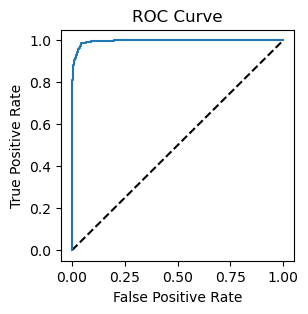

In [154]:
# Compute predicted probabilities
y_pred_prob = lg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(3,3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Compute and print AUC score
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

#### Mode Performance

The model has a really good accuracy score & ROC AUC score

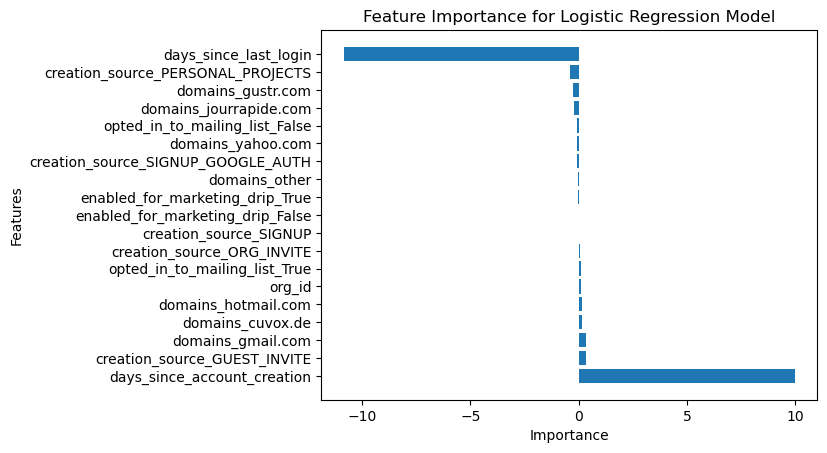

In [155]:
# Get the feature importance
coef = lg.coef_[0]
importance = coef

# Sort the features by importance in descending order
indices = importance.argsort()[::-1]
features = X_train.columns[indices]

# Plot the feature importance
plt.barh(range(len(X_train.columns)), importance[indices])
plt.yticks(range(len(X_train.columns)), features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

Top positive features:
- Days since account creation
- Creation source by guest invite
- Email with gmail.com 

The accuracy is 97.79% and the model uses some email domains and creation sources as top features.

Specifically, user accounts emailing from gmail.com and created through guest invite are most likely to become adopted users